<a href="https://colab.research.google.com/github/ThaminduSulakshana/Medical_Image_Synthesis/blob/main/Medical_Image_Synthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Medical imaging Synthesis, including X-rays, CT scans, and MRIs, uses generative AI  algorithms to extract meaningful information from vast data. AI detects subtle patterns, enables early intervention, and reduces risks in minimally invasive procedures. Integrating imaging data with genomics enhances healthcare precision.

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Generative Models in Healthcare/input/scraped_data.csv'
df = pd.read_csv(file_path)

In [ ]:
# Load the regular expression library
import re
import pandas as pd

# Remove punctuation and brackets
df['Abstracts_processed'] = df['Abstracts'].map(lambda x: re.sub('[,\.!?]', '', x))
df['Abstracts_processed'] = df['Abstracts_processed'].map(lambda x: re.sub(r'^\[|\]$', '', x))

# Remove single quotes and double quotes
df['Abstracts_processed'] = df['Abstracts_processed'].map(lambda x: re.sub(r"['\"]", '', x))

for i in range(len(df)):
  df['Abstracts_processed'][i] = df['Abstracts_processed'][i][11:]

# Convert the abstracts to lowercase
df['Abstracts_processed'] = df['Abstracts_processed'].str.lower()

# Print the processed abstracts of the first rows
print(df['Abstracts_processed'].head())

<ipython-input-6-35c88f914e55>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Abstracts_processed'][i] = df['Abstracts_processed'][i][11:]


0    u-net is an image segmentation technique devel...
1    since its renaissance deep learning (dl) has b...
2    medical image fusion which aims to combine mul...
3    the annual ieee 5-minute video clip contest (5...
4    automatic medical image segmentation has made ...
Name: Abstracts_processed, dtype: object


<ipython-input-7-6ebc8c578c2f>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df["Abstracts_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True) | \
<ipython-input-7-6ebc8c578c2f>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["title_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True)


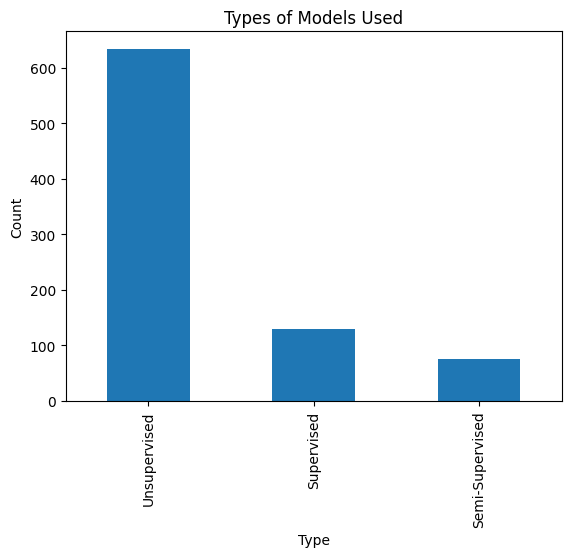

In [ ]:
import matplotlib.pyplot as plt

# Create a boolean mask to filter rows based on the combined search condition
mask = df["Abstracts_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True) | \
       df["title_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True)

# Apply the mask to the DataFrame and count the occurrence of each type
type_counts = df[mask].apply(lambda x: "Semi-Supervised" if "semi" in x["Abstracts_processed"] or "semi" in x["title_processed"]
                                         else "Supervised" if "supervised" in x["Abstracts_processed"] or "supervised" in x["title_processed"]
                                         else "Unsupervised", axis=1).value_counts()

# Plot the counts as a bar plot
type_counts.plot(kind='bar')
plt.title("Types of Models Used")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [ ]:
import re
import pandas as pd

# Function to extract models or methods mentioned in the text
def extract_models(text):
    # Define patterns for common model or method names
    model_patterns = [
        r"U-Net",
        r"ResNet",
        r"GAN",
        r"SVM",
        r"DenseNet",
        r"VGGNet",
        r"InceptionNet",
        r"EfficientNet",
        r"MobileNet",
        r"V-Net",
        r"DeepLab",
        r"Mask R-CNN",
        r"R-CNN",
        r"NASNet",
        r"SE-Net",
        r"Xception",
        r"SR",
        r"Transformer",
        r"DS-TransUNet",
        r"MedMNIST",
        r"IoMT",
        r"DLaST",
        r"MED-MNIST",
        r"VinDr-CXR",
        r"DCAC",
        r"MAGAN"
    ]

    mentioned_models = []
    # Find matches of model patterns in the text
    for pattern in model_patterns:
        if re.search(pattern, text, flags=re.IGNORECASE):
            mentioned_models.append(pattern)

    return mentioned_models

# Create a new column 'Models_Used' to store the mentioned models
df['Models_Used'] = ""

# Extract and save the mentioned models for each abstract and title
for i, (abstract, title) in enumerate(zip(df['Abstracts_processed'], df['title_processed'])):
    abstract_models = extract_models(abstract)
    title_models = extract_models(title)
    all_models = abstract_models + title_models
    unique_models = list(set(all_models))
    if unique_models:
        df.at[i, 'Models_Used'] = ', '.join(unique_models)
    else:
        df.at[i, 'Models_Used'] = "NA"

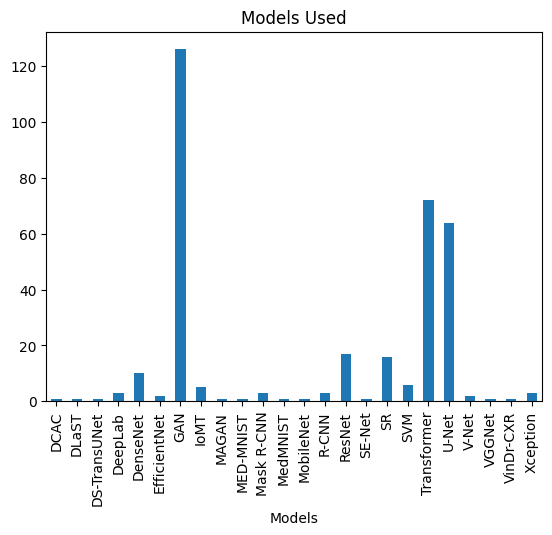

In [ ]:
# Remove NA values and "NA" string from the "Models_Used" column
df_cleaned = df.dropna(subset=["Models_Used"])
df_cleaned = df_cleaned[df_cleaned["Models_Used"] != "NA"]

# Split multiple models into separate rows
df_split = df_cleaned.assign(Models_Used=df_cleaned["Models_Used"].str.split(", ")).explode("Models_Used")

# Group the papers by models used
groups = df_split.groupby("Models_Used")

# Determine the size of each group
counts = groups.size()

# Visualize the counts as a bar plot
import matplotlib.pyplot as plt
%matplotlib inline
counts.plot(kind='bar')
plt.title("Models Used")
plt.xlabel("Models")
plt.show()

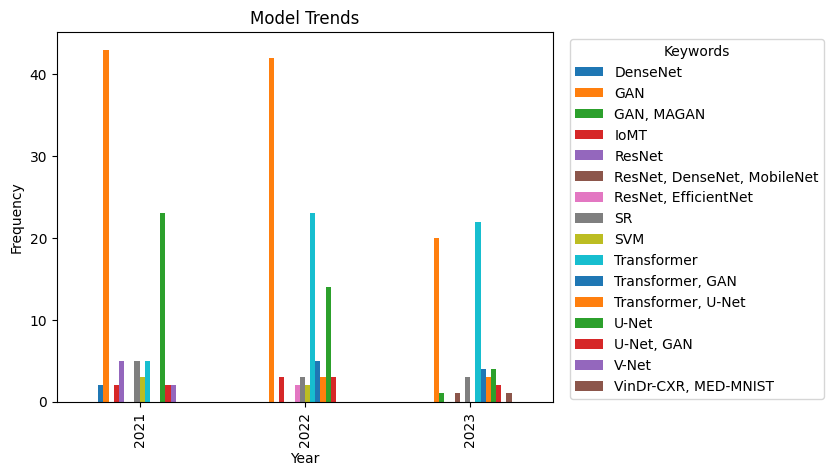

In [ ]:
df = df.dropna(subset=["Models_Used"])
df = df[df["Models_Used"] != "NA"]

# Group the papers by publication year and count the frequency of specific keywords or topics
keyword_counts = df.groupby("Year")["Models_Used"].apply(lambda x: x.explode().value_counts().nlargest(10))

# Split multiple models into separate rows
df = df.assign(Models_Used=df_cleaned["Models_Used"].str.split(", ")).explode("Models_Used")

# Plot the keyword counts as a bar plot
ax = keyword_counts.unstack().plot(kind='bar')
plt.title("Model Trends")
plt.xlabel("Year")
plt.ylabel("Frequency")

# Move the legend to the right of the graph
plt.legend(title="Keywords", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.show()

AI at the cutting edge of Medical Imaging Synthesis


In [ ]:
#Setup
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import os
import seaborn as sns
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, Reshape, Input, Conv2DTranspose
from keras.layers import Activation, LeakyReLU, BatchNormalization, Dropout, Resizing
from keras.losses import BinaryCrossentropy
from tensorflow.keras.applications import VGG16

import warnings
warnings.filterwarnings('ignore')

try:
    from tensorflow.keras.optimizers import Adam
except:
    from keras.optimizers import Adam

In [ ]:
NOISE_DIM = 100
BATCH_SIZE = 4
STEPS_PER_EPOCH = 4000
EPOCHS = 10
SEED = 40
WIDTH, HEIGHT, CHANNELS = 128, 128, 1

OPTIMIZER = Adam(0.0002, 0.5)

In [ ]:
MAIN_DIR = "/content/drive/MyDrive/Generative Models in Healthcare/input/brain-mri-images-for-brain-tumor-detection/yes"

In [ ]:
#Loading and Preprocessing the Images
def load_images(folder):

    imgs = []
    target = 1
    labels = []
    for i in os.listdir(folder):
        img_dir = os.path.join(folder,i)
        try:
            img = cv2.imread(img_dir)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (128,128))
            imgs.append(img)
            labels.append(target)
        except:
            continue

    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

In [ ]:
data, labels = load_images(MAIN_DIR)
data.shape, labels.shape

((155, 128, 128), (155,))

In [ ]:
#Generate 20 random numbers to index images from data
np.random.seed(SEED)
idxs = np.random.randint(0, 155, 20)

In [ ]:
X_train = data[idxs]
X_train.shape

(20, 128, 128)

In [ ]:
# Normalize the Images
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

# Reshape images
X_train = X_train.reshape(-1, WIDTH,HEIGHT,CHANNELS)

# Check shape
X_train.shape

(20, 128, 128, 1)

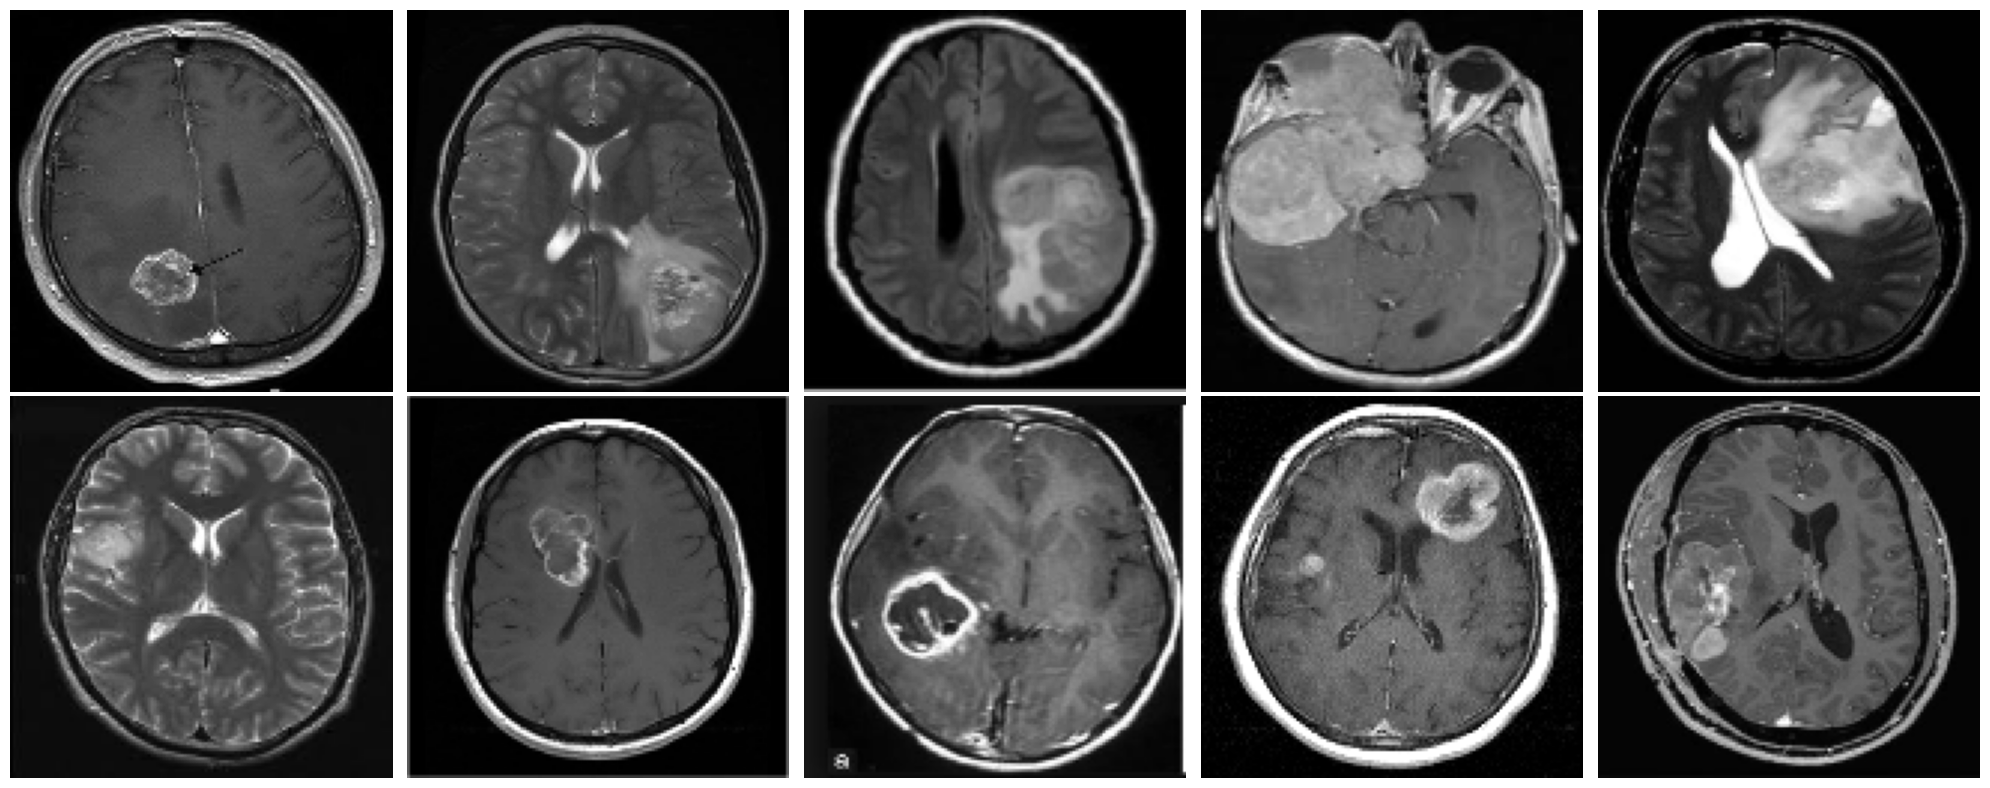

In [ ]:
#Plotting The Real Images
plt.figure(figsize=(20,8))
for i in range(10):
    axs = plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    plt.subplots_adjust(wspace=None, hspace=None)
plt.tight_layout()

In [ ]:
#The Architecture
def build_generator():

    """
        Generator model "generates" images using random noise. The random noise AKA Latent Vector
        is sampled from a Normal Distribution which is given as the input to the Generator. Using
        Transposed Convolution, the latent vector is transformed to produce an image
        We use 3 Conv2DTranspose layers (which help in producing an image using features; opposite
        of Convolutional Learning)

        Input: Random Noise / Latent Vector
        Output: Image
    """

    model = Sequential([

        Dense(32*32*256, input_dim=NOISE_DIM),
        LeakyReLU(alpha=0.2),
        Reshape((32,32,256)),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(CHANNELS, (4, 4), padding='same', activation='tanh')
    ],
    name="generator")
    model.summary()
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER, )

    return model

In [ ]:
def build_discriminator():

    """
        Discriminator is the model which is responsible for classifying the generated images
        as fake or real. Our end goal is to create a Generator so powerful that the Discriminator
        is unable to classify real and fake images
        A simple Convolutional Neural Network with 2 Conv2D layers connected to a Dense output layer
        Output layer activation is Sigmoid since this is a Binary Classifier

        Input: Generated / Real Image
        Output: Validity of Image (Fake or Real)

    """

    model = Sequential([

        Conv2D(64, (3, 3), padding='same', input_shape=(WIDTH, HEIGHT, CHANNELS)),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(256, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Flatten(),
        Dropout(0.4),
        Dense(1, activation="sigmoid", input_shape=(WIDTH, HEIGHT, CHANNELS))
    ], name="discriminator")
    model.summary()
    model.compile(loss="binary_crossentropy",optimizer=OPTIMIZER, )

    return model

In [ ]:
#Putting it together
print('\n')
discriminator = build_discriminator()
print('\n')
generator = build_generator()

discriminator.trainable = False

gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

print("The Combined Network:\n")
gan.summary()



Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)   

In [ ]:
def sample_images(noise, subplots, figsize=(22,8), save=False):
    generated_images = generator.predict(noise)
    plt.figure(figsize=figsize)

    for i, image in enumerate(generated_images):
        plt.subplot(subplots[0], subplots[1], i+1)
        if CHANNELS == 1:
            plt.imshow(image.reshape((WIDTH, HEIGHT)), cmap='gray')

        else:
            plt.imshow(image.reshape((WIDTH, HEIGHT, CHANNELS)))
        if save == True:
            img_name = "gen" + str(i)
            plt.savefig(img_name)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
#The Training
np.random.seed(SEED)
for epoch in range(10):
    for batch in tqdm(range(STEPS_PER_EPOCH)):

        noise = np.random.normal(0,1, size=(BATCH_SIZE, NOISE_DIM))
        fake_X = generator.predict(noise)

        idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)
        real_X = X_train[idx]

        X = np.concatenate((real_X, fake_X))

        disc_y = np.zeros(2*BATCH_SIZE)
        disc_y[:BATCH_SIZE] = 1

        d_loss = discriminator.train_on_batch(X, disc_y)

        y_gen = np.ones(BATCH_SIZE)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f"EPOCH: {epoch + 1} Generator Loss: {g_loss:.4f} Discriminator Loss: {d_loss:.4f}")
    noise = np.random.normal(0, 1, size=(10,NOISE_DIM))
    sample_images(noise, (2,5))

#Generation
noise = np.random.normal(0, 1, size=(100, NOISE_DIM))
sample_images(noise, (10,10), (24,20), save=True)

  0%|          | 0/4000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 821ms/step


  0%|          | 1/4000 [00:09<10:51:16,  9.77s/it]

1/1 [==============================] - 1s 846ms/step


  0%|          | 2/4000 [00:13<7:10:37,  6.46s/it] 

1/1 [==============================] - 0s 327ms/step


  0%|          | 3/4000 [00:17<5:50:06,  5.26s/it]

1/1 [==============================] - 0s 329ms/step


  0%|          | 4/4000 [00:20<4:51:17,  4.37s/it]

1/1 [==============================] - 1s 524ms/step


  0%|          | 5/4000 [00:25<5:00:03,  4.51s/it]

1/1 [==============================] - 0s 323ms/step


  0%|          | 6/4000 [00:28<4:26:42,  4.01s/it]

1/1 [==============================] - 0s 305ms/step


  0%|          | 7/4000 [00:31<4:06:14,  3.70s/it]

1/1 [==============================] - 0s 325ms/step


  0%|          | 8/4000 [00:34<3:58:19,  3.58s/it]

1/1 [==============================] - 0s 391ms/step


  0%|          | 9/4000 [00:40<4:36:38,  4.16s/it]

1/1 [==============================] - 1s 600ms/step


  0%|          | 10/4000 [00:45<4:48:02,  4.33s/it]

1/1 [==============================] - 0s 347ms/step


  0%|          | 11/4000 [00:48<4:22:53,  3.95s/it]

1/1 [==============================] - 0s 321ms/step


  0%|          | 12/4000 [00:51<4:19:05,  3.90s/it]

1/1 [==============================] - 0s 486ms/step


  0%|          | 13/4000 [00:55<4:16:17,  3.86s/it]

1/1 [==============================] - 0s 310ms/step


  0%|          | 14/4000 [00:58<4:00:27,  3.62s/it]

1/1 [==============================] - 0s 303ms/step


  0%|          | 15/4000 [01:02<3:57:31,  3.58s/it]

1/1 [==============================] - 0s 484ms/step


  0%|          | 16/4000 [01:07<4:29:16,  4.06s/it]

1/1 [==============================] - 0s 474ms/step


  0%|          | 17/4000 [01:11<4:23:49,  3.97s/it]

1/1 [==============================] - 0s 318ms/step


  0%|          | 18/4000 [01:14<4:06:05,  3.71s/it]

1/1 [==============================] - 0s 319ms/step


  0%|          | 19/4000 [01:17<3:52:25,  3.50s/it]

1/1 [==============================] - 0s 322ms/step


  0%|          | 20/4000 [01:20<3:52:19,  3.50s/it]

1/1 [==============================] - 0s 473ms/step


  1%|          | 21/4000 [01:24<4:04:56,  3.69s/it]

1/1 [==============================] - 1s 800ms/step


  1%|          | 22/4000 [01:29<4:18:32,  3.90s/it]

1/1 [==============================] - 0s 304ms/step


  1%|          | 23/4000 [01:32<4:02:37,  3.66s/it]

1/1 [==============================] - 0s 327ms/step


  1%|          | 24/4000 [01:36<4:03:45,  3.68s/it]

1/1 [==============================] - 1s 520ms/step


  1%|          | 25/4000 [01:40<4:08:12,  3.75s/it]

1/1 [==============================] - 0s 307ms/step


  1%|          | 26/4000 [01:43<3:55:27,  3.55s/it]

1/1 [==============================] - 0s 322ms/step


  1%|          | 27/4000 [01:46<3:45:21,  3.40s/it]

1/1 [==============================] - 0s 328ms/step


  1%|          | 28/4000 [01:49<3:49:41,  3.47s/it]

1/1 [==============================] - 0s 479ms/step


  1%|          | 29/4000 [01:54<4:04:09,  3.69s/it]

1/1 [==============================] - 0s 336ms/step


  1%|          | 30/4000 [01:57<4:03:53,  3.69s/it]

1/1 [==============================] - 0s 319ms/step


  1%|          | 31/4000 [02:00<3:52:24,  3.51s/it]

1/1 [==============================] - 0s 317ms/step


  1%|          | 32/4000 [02:04<3:52:58,  3.52s/it]

1/1 [==============================] - 0s 483ms/step


  1%|          | 33/4000 [02:08<4:06:39,  3.73s/it]

1/1 [==============================] - 0s 329ms/step


  1%|          | 34/4000 [02:11<3:53:13,  3.53s/it]

1/1 [==============================] - 0s 336ms/step


  1%|          | 35/4000 [02:14<3:46:09,  3.42s/it]

1/1 [==============================] - 0s 332ms/step


  1%|          | 36/4000 [02:18<3:43:38,  3.39s/it]

1/1 [==============================] - 1s 520ms/step


  1%|          | 37/4000 [02:22<4:06:56,  3.74s/it]

1/1 [==============================] - 0s 310ms/step


  1%|          | 38/4000 [02:25<3:54:01,  3.54s/it]

1/1 [==============================] - 0s 316ms/step


  1%|          | 39/4000 [02:28<3:46:12,  3.43s/it]

1/1 [==============================] - 0s 311ms/step


  1%|          | 40/4000 [02:32<3:39:25,  3.32s/it]

1/1 [==============================] - 0s 455ms/step


  1%|          | 41/4000 [02:36<4:06:01,  3.73s/it]

1/1 [==============================] - 0s 337ms/step


  1%|          | 42/4000 [02:39<3:53:09,  3.53s/it]

1/1 [==============================] - 0s 316ms/step


  1%|          | 43/4000 [02:42<3:44:03,  3.40s/it]

1/1 [==============================] - 0s 338ms/step


  1%|          | 44/4000 [02:45<3:37:54,  3.30s/it]

1/1 [==============================] - 0s 343ms/step


  1%|          | 45/4000 [02:50<3:59:23,  3.63s/it]

1/1 [==============================] - 1s 506ms/step


  1%|          | 46/4000 [02:53<3:54:05,  3.55s/it]

1/1 [==============================] - 0s 321ms/step


  1%|          | 47/4000 [02:56<3:45:52,  3.43s/it]

1/1 [==============================] - 0s 316ms/step


  1%|          | 48/4000 [02:59<3:38:43,  3.32s/it]

1/1 [==============================] - 0s 315ms/step


  1%|          | 49/4000 [03:03<3:53:12,  3.54s/it]

1/1 [==============================] - 0s 491ms/step


  1%|▏         | 50/4000 [03:07<3:54:37,  3.56s/it]

1/1 [==============================] - 0s 319ms/step


  1%|▏         | 51/4000 [03:10<3:46:12,  3.44s/it]

1/1 [==============================] - 0s 312ms/step


  1%|▏         | 52/4000 [03:14<3:52:36,  3.54s/it]

1/1 [==============================] - 0s 329ms/step


  1%|▏         | 53/4000 [03:18<4:05:48,  3.74s/it]

1/1 [==============================] - 1s 504ms/step


  1%|▏         | 54/4000 [03:22<4:12:12,  3.83s/it]

1/1 [==============================] - 0s 331ms/step


  1%|▏         | 55/4000 [03:25<3:55:59,  3.59s/it]

1/1 [==============================] - 0s 315ms/step


  1%|▏         | 56/4000 [03:28<3:46:43,  3.45s/it]

1/1 [==============================] - 0s 336ms/step


  1%|▏         | 57/4000 [03:33<4:04:46,  3.72s/it]

1/1 [==============================] - 1s 544ms/step


  1%|▏         | 58/4000 [03:36<4:02:05,  3.68s/it]

1/1 [==============================] - 0s 311ms/step


  1%|▏         | 59/4000 [03:39<3:49:20,  3.49s/it]

1/1 [==============================] - 0s 321ms/step


  2%|▏         | 60/4000 [03:42<3:41:01,  3.37s/it]

1/1 [==============================] - 0s 310ms/step


  2%|▏         | 61/4000 [03:46<3:53:05,  3.55s/it]

1/1 [==============================] - 0s 461ms/step


  2%|▏         | 62/4000 [03:50<3:58:19,  3.63s/it]

1/1 [==============================] - 0s 314ms/step


  2%|▏         | 63/4000 [03:53<3:47:56,  3.47s/it]

1/1 [==============================] - 0s 325ms/step


  2%|▏         | 64/4000 [03:57<3:41:08,  3.37s/it]

1/1 [==============================] - 0s 311ms/step


  2%|▏         | 65/4000 [04:00<3:49:09,  3.49s/it]

1/1 [==============================] - 0s 493ms/step


  2%|▏         | 66/4000 [04:04<3:59:30,  3.65s/it]

1/1 [==============================] - 0s 322ms/step


  2%|▏         | 67/4000 [04:07<3:49:10,  3.50s/it]

1/1 [==============================] - 0s 312ms/step


  2%|▏         | 68/4000 [04:11<3:41:04,  3.37s/it]

1/1 [==============================] - 0s 322ms/step


  2%|▏         | 69/4000 [04:14<3:40:35,  3.37s/it]

1/1 [==============================] - 0s 497ms/step


  2%|▏         | 70/4000 [04:18<4:03:16,  3.71s/it]

1/1 [==============================] - 0s 479ms/step


  2%|▏         | 71/4000 [04:23<4:22:11,  4.00s/it]

1/1 [==============================] - 0s 332ms/step


  2%|▏         | 72/4000 [04:26<4:04:48,  3.74s/it]

1/1 [==============================] - 0s 344ms/step


  2%|▏         | 73/4000 [04:30<4:05:52,  3.76s/it]

1/1 [==============================] - 1s 520ms/step


  2%|▏         | 74/4000 [04:34<4:08:12,  3.79s/it]

1/1 [==============================] - 0s 327ms/step


  2%|▏         | 75/4000 [04:37<3:55:49,  3.60s/it]

1/1 [==============================] - 0s 306ms/step


  2%|▏         | 76/4000 [04:40<3:46:24,  3.46s/it]

1/1 [==============================] - 0s 307ms/step


  2%|▏         | 77/4000 [04:44<3:52:53,  3.56s/it]

1/1 [==============================] - 1s 530ms/step


  2%|▏         | 78/4000 [04:48<4:04:19,  3.74s/it]

1/1 [==============================] - 0s 334ms/step


  2%|▏         | 79/4000 [04:51<3:52:39,  3.56s/it]

1/1 [==============================] - 0s 352ms/step


  2%|▏         | 80/4000 [04:55<3:47:45,  3.49s/it]

1/1 [==============================] - 0s 316ms/step


  2%|▏         | 81/4000 [04:58<3:50:54,  3.54s/it]

1/1 [==============================] - 1s 531ms/step


  2%|▏         | 82/4000 [05:02<4:04:24,  3.74s/it]

1/1 [==============================] - 0s 320ms/step


  2%|▏         | 83/4000 [05:06<3:52:14,  3.56s/it]

1/1 [==============================] - 0s 323ms/step


  2%|▏         | 84/4000 [05:09<3:46:14,  3.47s/it]

1/1 [==============================] - 0s 330ms/step


  2%|▏         | 85/4000 [05:13<3:52:24,  3.56s/it]

1/1 [==============================] - 1s 517ms/step


  2%|▏         | 86/4000 [05:17<4:05:35,  3.76s/it]

1/1 [==============================] - 0s 332ms/step


  2%|▏         | 87/4000 [05:20<3:53:22,  3.58s/it]

1/1 [==============================] - 0s 313ms/step


  2%|▏         | 88/4000 [05:23<3:43:48,  3.43s/it]

1/1 [==============================] - 0s 312ms/step


  2%|▏         | 89/4000 [05:26<3:41:13,  3.39s/it]

1/1 [==============================] - 1s 536ms/step


  2%|▏         | 90/4000 [05:31<4:05:52,  3.77s/it]

1/1 [==============================] - 0s 329ms/step


  2%|▏         | 91/4000 [05:34<3:51:48,  3.56s/it]

1/1 [==============================] - 0s 335ms/step


  2%|▏         | 92/4000 [05:37<3:45:45,  3.47s/it]

1/1 [==============================] - 0s 335ms/step


  2%|▏         | 93/4000 [05:41<3:41:29,  3.40s/it]

1/1 [==============================] - 1s 517ms/step


  2%|▏         | 94/4000 [05:45<4:03:18,  3.74s/it]

1/1 [==============================] - 0s 316ms/step


  2%|▏         | 95/4000 [05:48<3:51:06,  3.55s/it]

1/1 [==============================] - 0s 340ms/step


  2%|▏         | 96/4000 [05:51<3:43:50,  3.44s/it]

1/1 [==============================] - 0s 312ms/step


  2%|▏         | 97/4000 [05:55<3:37:44,  3.35s/it]

1/1 [==============================] - 0s 426ms/step


  2%|▏         | 98/4000 [05:59<4:02:44,  3.73s/it]

1/1 [==============================] - 0s 369ms/step


  2%|▏         | 99/4000 [06:02<3:53:25,  3.59s/it]

1/1 [==============================] - 0s 331ms/step


  2%|▎         | 100/4000 [06:06<3:43:01,  3.43s/it]

1/1 [==============================] - 0s 330ms/step


  3%|▎         | 101/4000 [06:09<3:37:11,  3.34s/it]

1/1 [==============================] - 0s 344ms/step


  3%|▎         | 102/4000 [06:13<3:56:47,  3.64s/it]

1/1 [==============================] - 1s 517ms/step


  3%|▎         | 103/4000 [06:16<3:52:27,  3.58s/it]

1/1 [==============================] - 0s 325ms/step


  3%|▎         | 104/4000 [06:20<3:43:38,  3.44s/it]

1/1 [==============================] - 0s 322ms/step


  3%|▎         | 105/4000 [06:23<3:37:30,  3.35s/it]

1/1 [==============================] - 0s 319ms/step


  3%|▎         | 106/4000 [06:27<3:53:28,  3.60s/it]

1/1 [==============================] - 1s 508ms/step


  3%|▎         | 107/4000 [06:31<3:55:20,  3.63s/it]

1/1 [==============================] - 0s 331ms/step


  3%|▎         | 108/4000 [06:34<3:48:03,  3.52s/it]

1/1 [==============================] - 0s 336ms/step


  3%|▎         | 109/4000 [06:37<3:43:05,  3.44s/it]

1/1 [==============================] - 0s 349ms/step


  3%|▎         | 110/4000 [06:41<3:55:06,  3.63s/it]

1/1 [==============================] - 1s 502ms/step


  3%|▎         | 111/4000 [06:45<3:56:25,  3.65s/it]

1/1 [==============================] - 0s 313ms/step


  3%|▎         | 112/4000 [06:48<3:46:08,  3.49s/it]

1/1 [==============================] - 0s 326ms/step


  3%|▎         | 113/4000 [06:51<3:39:09,  3.38s/it]

1/1 [==============================] - 0s 307ms/step


  3%|▎         | 114/4000 [06:55<3:45:03,  3.47s/it]

1/1 [==============================] - 1s 522ms/step


  3%|▎         | 115/4000 [06:59<3:54:28,  3.62s/it]

1/1 [==============================] - 0s 327ms/step


  3%|▎         | 116/4000 [07:02<3:45:08,  3.48s/it]

1/1 [==============================] - 0s 308ms/step


  3%|▎         | 117/4000 [07:05<3:38:27,  3.38s/it]

1/1 [==============================] - 0s 322ms/step


  3%|▎         | 118/4000 [07:09<3:43:50,  3.46s/it]

1/1 [==============================] - 1s 514ms/step


  3%|▎         | 119/4000 [07:13<3:56:47,  3.66s/it]

1/1 [==============================] - 0s 326ms/step


  3%|▎         | 120/4000 [07:16<3:45:41,  3.49s/it]

1/1 [==============================] - 0s 323ms/step


  3%|▎         | 121/4000 [07:19<3:37:35,  3.37s/it]

1/1 [==============================] - 0s 339ms/step


  3%|▎         | 122/4000 [07:22<3:37:53,  3.37s/it]

1/1 [==============================] - 1s 523ms/step


  3%|▎         | 123/4000 [07:27<4:00:00,  3.71s/it]

1/1 [==============================] - 0s 315ms/step


  3%|▎         | 124/4000 [07:30<3:47:53,  3.53s/it]

1/1 [==============================] - 0s 309ms/step


  3%|▎         | 125/4000 [07:33<3:40:00,  3.41s/it]

1/1 [==============================] - 0s 303ms/step


  3%|▎         | 126/4000 [07:36<3:33:08,  3.30s/it]

1/1 [==============================] - 1s 528ms/step


  3%|▎         | 127/4000 [07:42<4:14:52,  3.95s/it]

1/1 [==============================] - 1s 566ms/step


  3%|▎         | 128/4000 [07:46<4:20:48,  4.04s/it]

1/1 [==============================] - 0s 327ms/step


  3%|▎         | 129/4000 [07:49<4:03:42,  3.78s/it]

1/1 [==============================] - 0s 316ms/step


  3%|▎         | 130/4000 [07:52<3:52:05,  3.60s/it]

1/1 [==============================] - 0s 324ms/step


  3%|▎         | 131/4000 [07:56<4:00:42,  3.73s/it]

1/1 [==============================] - 0s 487ms/step


  3%|▎         | 132/4000 [08:00<4:00:51,  3.74s/it]

1/1 [==============================] - 0s 319ms/step


  3%|▎         | 133/4000 [08:03<3:50:21,  3.57s/it]

1/1 [==============================] - 0s 323ms/step


  3%|▎         | 134/4000 [08:06<3:41:32,  3.44s/it]

1/1 [==============================] - 0s 315ms/step


  3%|▎         | 135/4000 [08:10<3:47:16,  3.53s/it]

1/1 [==============================] - 0s 477ms/step


  3%|▎         | 136/4000 [08:14<3:53:52,  3.63s/it]

1/1 [==============================] - 0s 311ms/step


  3%|▎         | 137/4000 [08:17<3:42:57,  3.46s/it]

1/1 [==============================] - 0s 311ms/step


  3%|▎         | 138/4000 [08:20<3:35:56,  3.35s/it]

1/1 [==============================] - 0s 307ms/step


  3%|▎         | 139/4000 [08:24<3:41:02,  3.44s/it]

1/1 [==============================] - 1s 521ms/step


  4%|▎         | 140/4000 [08:28<3:55:38,  3.66s/it]

1/1 [==============================] - 0s 334ms/step


  4%|▎         | 141/4000 [08:31<3:45:40,  3.51s/it]

1/1 [==============================] - 0s 317ms/step


  4%|▎         | 142/4000 [08:34<3:37:20,  3.38s/it]

1/1 [==============================] - 0s 309ms/step


  4%|▎         | 143/4000 [08:37<3:34:35,  3.34s/it]

1/1 [==============================] - 0s 489ms/step


  4%|▎         | 144/4000 [08:42<3:56:36,  3.68s/it]

1/1 [==============================] - 0s 329ms/step


  4%|▎         | 145/4000 [08:45<3:46:29,  3.53s/it]

1/1 [==============================] - 0s 342ms/step


  4%|▎         | 146/4000 [08:49<3:45:22,  3.51s/it]

1/1 [==============================] - 0s 310ms/step


  4%|▎         | 147/4000 [08:52<3:38:01,  3.40s/it]

1/1 [==============================] - 1s 504ms/step


  4%|▎         | 148/4000 [08:56<4:02:14,  3.77s/it]

1/1 [==============================] - 0s 322ms/step


  4%|▎         | 149/4000 [08:59<3:49:01,  3.57s/it]

1/1 [==============================] - 0s 326ms/step


  4%|▍         | 150/4000 [09:02<3:39:18,  3.42s/it]

1/1 [==============================] - 0s 306ms/step


  4%|▍         | 151/4000 [09:06<3:32:22,  3.31s/it]

1/1 [==============================] - 0s 308ms/step


  4%|▍         | 152/4000 [09:10<3:54:06,  3.65s/it]

1/1 [==============================] - 0s 470ms/step


  4%|▍         | 153/4000 [09:13<3:46:58,  3.54s/it]

1/1 [==============================] - 0s 344ms/step


  4%|▍         | 154/4000 [09:16<3:39:43,  3.43s/it]

1/1 [==============================] - 0s 341ms/step


  4%|▍         | 155/4000 [09:20<3:35:06,  3.36s/it]

1/1 [==============================] - 0s 318ms/step


  4%|▍         | 155/4000 [09:24<3:53:18,  3.64s/it]


KeyboardInterrupt: 

In [ ]:
#Testing Generated Sample
generated_images = generator.predict(noise)
generated_images.shape

1/1 [==============================] - 0s 313ms/step


(4, 128, 128, 1)

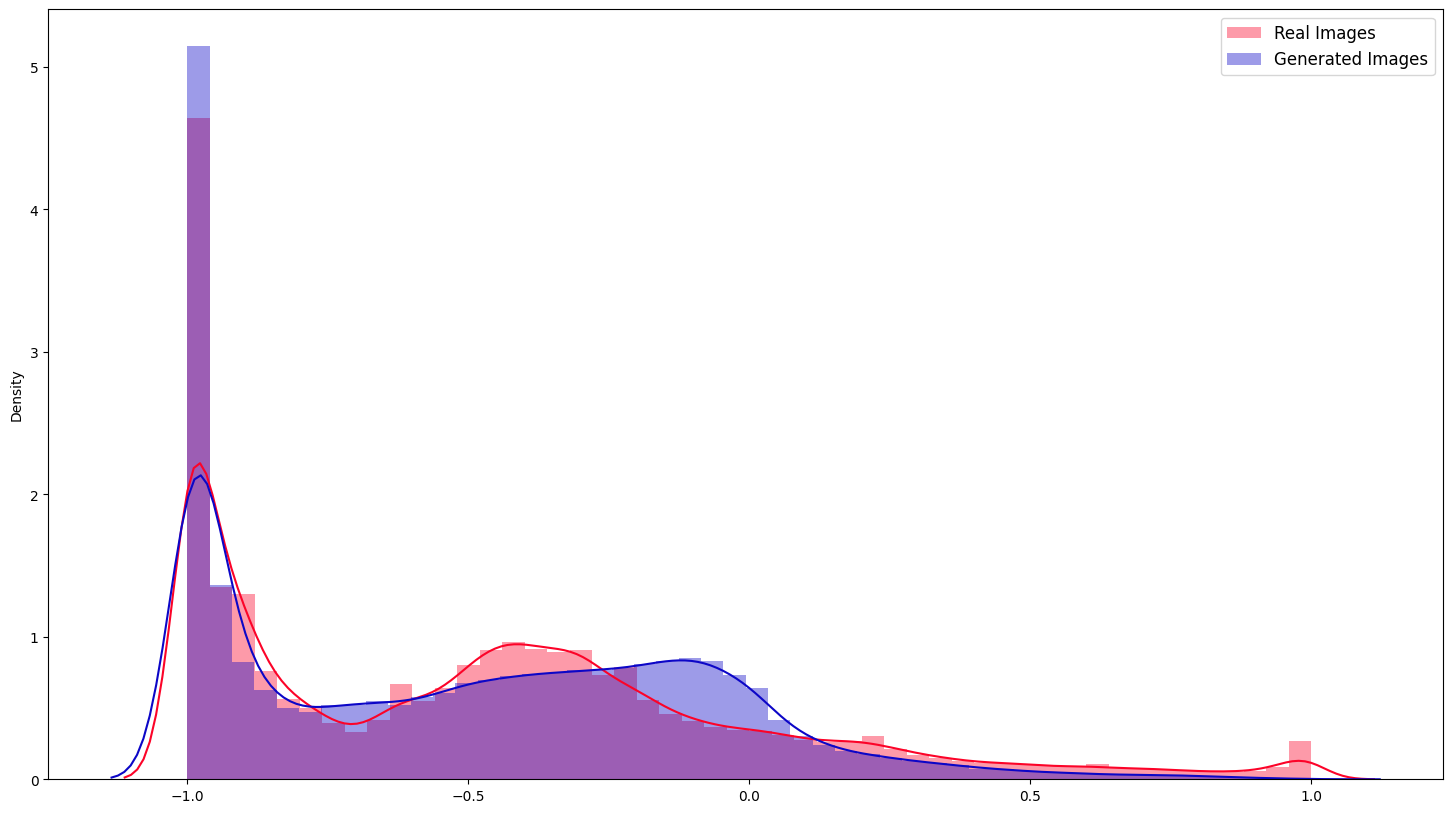

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(18,10))

sns.distplot(X_train, label='Real Images', hist=True, color='#fc0328', ax=axs)
sns.distplot(generated_images, label='Generated Images', hist=True, color='#0c06c7', ax=axs)

axs.legend(loc='upper right', prop={'size': 12})

plt.show()